In [67]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [68]:
offers_connection = sqlite3.connect('../datasets/offers_dataset.db')
offers_frame = pd.read_sql_query('''SELECT * FROM offers''', offers_connection)
offers_frame.set_index('ID', inplace=True)
offers_connection.close()

# [!] Le descrizioni all'interno del notebook non sono mostrate nella loro versione completa
#     per accedere ad una specifica descrizione usare il metodo: offers_frame.loc[ID, NomeColonna]
offers_frame

Name  \
ID                               
1           Software Developer   
2    Junior Software Developer   
3           Software Developer   
4           Software Developer   
5    Senior Software Developer   
..                         ...   
850           JUNIOR DEVELOPER   
851   Sviluppatore Java Junior   
852   Stage Software Developer   
853              Web Developer   
854         Software Developer   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

## Data Exploration
Come prima cosa esaminiamo il nostro dataset di offerte, in particolare dovremmo verificare la qualità dei dati:
- Base   
    - Presenza di valori nulli
    - (**Importante**) Presenza di sinonimi geografici
    - Presenza di informazioni utili
- Avanzato
    - Analisi delle Parole Chiave (es. Titoli)
    - Analisi della distribuzione dei dati

**Presenza di Valori Nulli**
Come è possibile vedere di seguito il dataset contiene valori nulli solo per la colonna Location, il che però è normale, in quanto non tutte le Offerte di lavoro sono in presenza, quindi le Location mancanti rappresentano il numero di Offerte di lavoro in Remote.
Questa informazione è importante perchè in seguito ci sarà la necessità di rappresentare queste informazioni in modo omogeneo, in modo tale che un modello il cui scopo è raggruppare le Offerte (clustering, come proposto nell'Analisi del Problema) possa farlo in modo adeguato.

In [69]:
offers_frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 854 entries, 1 to 854
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          854 non-null    object
 1   Description   854 non-null    object
 2   Language      854 non-null    object
 3   LocationType  854 non-null    object
 4   Location      700 non-null    object
dtypes: object(5)
memory usage: 40.0+ KB


**Analisi dei Titoli**
Di seguito vengono analizzati i Titoli delle Offerte di lavoro con lo scopo di verificare la presenza di termini comuni, in particolare vengono usate delle basilari tecniche di Natural Language Processing come:
- **Tokenization**, utilizzata per dividere frasi o documenti in parole (*title.split()*) 
- **Rimozione della Punteggiatura**, utilizzata per migliorare la qualità dei dati estratti, in modo da non influenzare i risultati 
- **Normalizzazione**, utilizzata per ridurre la complessità del vocabolario e trattare parole con maiuscole e minuscole come equivalenti (*t.lower()*)

In [70]:
from string import punctuation
from collections import Counter

def count_words(document: str, counter: Counter):
    """
    :param document: a string representation of the document to inspect
    :param counter: a Python built-in object used to count occurrences of items
    """
    punct = [p for p in punctuation]
    for t in document.split():
        if not t in punct:
            counter[t.lower()] += 1


titles_counts = Counter()
offers_frame.Name.map(lambda text: count_words(text, titles_counts))

titles_counts

Counter({'software': 582,
         'developer': 522,
         'junior': 122,
         'engineer': 106,
         'senior': 83,
         'c#': 81,
         'java': 77,
         'sviluppatore': 73,
         'programmatore': 60,
         'settore': 54,
         'sanità': 54,
         'frontend': 30,
         'full': 28,
         'ai': 27,
         'trainer': 27,
         '(contract)': 27,
         'tecnico': 27,
         'bilance': 27,
         'digitali': 27,
         'supermercati': 27,
         'asp.net': 27,
         'manufacturing': 27,
         'relocation': 27,
         'usa': 27,
         'front-end': 27,
         'app': 27,
         'programmer': 27,
         'hmi': 27,
         'stage': 23,
         'web': 23,
         'graduate': 23,
         'ibp': 22,
         'algorithms': 22,
         'development': 22,
         'unity': 22,
         'game': 22,
         'remote': 19,
         'appartenente': 18,
         'alle': 18,
         'categorie': 18,
         'protette': 18,
       

Analisi delle occorrenze di parole:

In [ ]:
# Jacopo plotta qui

| OLD 
V
### LocationType Distribution

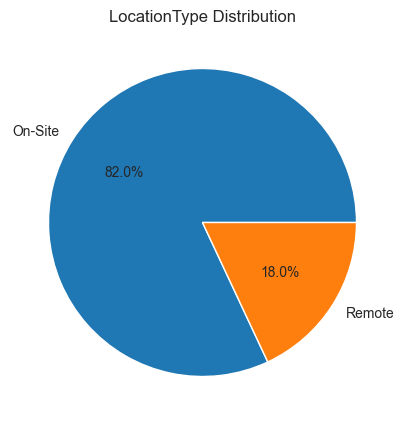

In [71]:
location_type_counts = offers_frame.value_counts('LocationType')
location_type_counts = location_type_counts.to_dict()

sns.set_style('darkgrid')
plt.figure(figsize=(5,5))
plt.pie(location_type_counts.values(), labels=location_type_counts.keys(), autopct='%1.1f%%')
plt.title('LocationType Distribution')
plt.show()